<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/UTS/Visual%20Task/UTS_Fish_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Exploring

In [ ]:
# Define the image size
image_size = (32, 32)

# Create ImageDataGenerators for loading and augmenting images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/dataset_ikan/train',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    'drive/MyDrive/dataset_ikan/val/',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    'drive/MyDrive/dataset_ikan/test/',
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


In [ ]:
# Menyimpan beberapa batch
num_batches = 32  # Jumlah batch yang ingin diambil
X_train = []
y_train = []

for _ in range(num_batches):
    X_batch, y_batch = next(train_generator)
    X_train.append(X_batch)
    y_train.append(y_batch)

# Menggabungkan data dari beberapa batch
X_train = np.vstack(X_train)
y_train = np.vstack(y_train)

# Mengecek bentuk
print(f"Shape X_train_all: {X_train.shape}")
print(f"Shape y_train_all: {y_train.shape}")

Shape X_train_all: (1024, 32, 32, 3)
Shape y_train_all: (1024, 31)


In [ ]:
# Menyimpan beberapa batch
num_batches = 32  # Jumlah batch yang ingin diambil
X_val = []
y_val = []

for _ in range(num_batches):
    X_batch, y_batch = next(train_generator)
    X_val.append(X_batch)
    y_val.append(y_batch)

# Menggabungkan data dari beberapa batch
X_val = np.vstack(X_val)
y_val = np.vstack(y_val)

# Mengecek bentuk
print(f"Shape X_train_all: {X_val.shape}")
print(f"Shape y_train_all: {y_val.shape}")

Shape X_train_all: (1024, 32, 32, 3)
Shape y_train_all: (1024, 31)


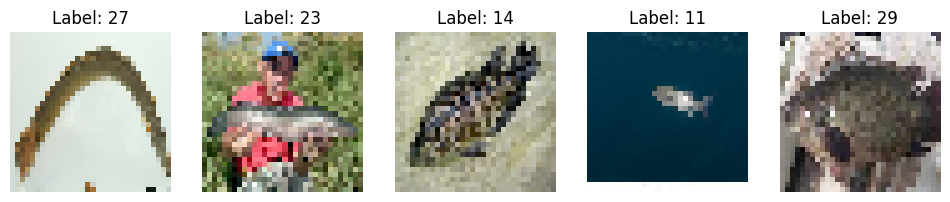

In [ ]:
# Membuat figure dengan 5 kolom untuk menampilkan gambar
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i in range(5):
    # Menampilkan gambar dari batch
    axes[i].imshow(X_train[i])  # x_batch berisi gambar
    axes[i].set_title(f"Label: {np.argmax(y_batch[i])}")  # y_batch berisi label dalam format one-hot, jadi kita ambil argmax
    axes[i].axis('off')  # Menyembunyikan sumbu

plt.show()

# Data Preprocessing

# CNN Model

In [ ]:
# Build a CNN model
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model_cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,911 (636.37 KB)

 Trainable params: 162,911 (636.37 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]

history = model_cnn.fit(
    train_generator,
    epochs=30,
    batch_size=64,
    validation_data=val_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 3370s 12s/step - accuracy: 0.1401 - loss: 3.2964 - val_accuracy: 0.2148 - val_loss: 2.8891
Epoch 2/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 99s 357ms/step - accuracy: 0.2145 - loss: 2.9179 - val_accuracy: 0.2879 - val_loss: 2.5965
Epoch 3/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 100s 362ms/step - accuracy: 0.2778 - loss: 2.6353 - val_accuracy: 0.3631 - val_loss: 2.2594
Epoch 4/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 101s 367ms/step - accuracy: 0.3153 - loss: 2.3992 - val_accuracy: 0.3715 - val_loss: 2.1751
Epoch 5/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 98s 357ms/step - accuracy: 0.3537 - loss: 2.2823 - val_accuracy: 0.4304 - val_loss: 1.9631
Epoch 6/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 98s 354ms/step - accuracy: 0.3847 - loss: 2.1496 - val_accuracy: 0.4537 - val_loss: 1.8395
Epoch 7/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 100s 363ms/step - accuracy: 0.4094 - loss: 2.0474 - val_accuracy: 0.4787 - val_loss: 1.7454
Epoch 8/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 140s 357ms/step - accuracy: 0.4358 - los

In [ ]:
test_loss, test_accuracy = model_cnn.evaluate(test_generator, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 0.7307
Test Accuracy: 0.8290


In [ ]:
# Melakukan prediksi dengan model
y_pred_probs = model_cnn.predict(test_generator, verbose=0)

# Mengambil kelas yang diprediksi (argmax) dari probabilitas prediksi
y_pred = np.argmax(y_pred_probs, axis=1)

# Menampilkan beberapa hasil prediksi
print("Predicted classes:", y_pred[:10])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Predicted classes: [ 0 11 21 17  0  0  0  0  0  0]


In [ ]:
y_test[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
len(y_test)

1760

In [ ]:
from collections import Counter
Counter(y_test)

Counter({np.int32(0): 34,
         np.int32(1): 43,
         np.int32(2): 40,
         np.int32(3): 62,
         np.int32(4): 30,
         np.int32(5): 38,
         np.int32(6): 55,
         np.int32(7): 77,
         np.int32(8): 124,
         np.int32(9): 41,
         np.int32(10): 63,
         np.int32(11): 238,
         np.int32(12): 22,
         np.int32(13): 53,
         np.int32(14): 39,
         np.int32(15): 44,
         np.int32(16): 58,
         np.int32(17): 65,
         np.int32(18): 52,
         np.int32(19): 51,
         np.int32(20): 34,
         np.int32(21): 38,
         np.int32(22): 38,
         np.int32(23): 60,
         np.int32(24): 33,
         np.int32(25): 64,
         np.int32(26): 48,
         np.int32(27): 57,
         np.int32(28): 47,
         np.int32(29): 56,
         np.int32(30): 56})

In [ ]:
Counter(y_pred)

Counter({np.int64(5): 30,
         np.int64(13): 56,
         np.int64(14): 28,
         np.int64(16): 56,
         np.int64(2): 36,
         np.int64(29): 56,
         np.int64(6): 60,
         np.int64(9): 42,
         np.int64(18): 49,
         np.int64(28): 54,
         np.int64(22): 36,
         np.int64(3): 86,
         np.int64(19): 50,
         np.int64(11): 254,
         np.int64(8): 142,
         np.int64(30): 67,
         np.int64(26): 46,
         np.int64(7): 68,
         np.int64(15): 45,
         np.int64(10): 59,
         np.int64(17): 74,
         np.int64(4): 18,
         np.int64(25): 46,
         np.int64(23): 51,
         np.int64(1): 35,
         np.int64(12): 19,
         np.int64(20): 34,
         np.int64(0): 39,
         np.int64(24): 30,
         np.int64(27): 60,
         np.int64(21): 34})

In [ ]:
# Mendapatkan label yang benar dari generator
y_test = test_generator.classes  # label asli

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 26   0   0   0   0   0   0   0   0   0   0   1   0   1   0   0   0   2
    0   1   0   2   0   0   0   0   0   1   0   0   0]
 [  1  28   0   2   0   1   0   0   0   0   0   2   0   2   0   0   0   2
    1   1   1   0   0   0   0   0   0   1   0   1   0]
 [  0   0  30   1   0   0   1   2   0   0   0   0   0   0   0   0   0   1
    1   0   0   1   0   0   0   1   0   1   0   0   1]
 [  0   0   0  58   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0   1   1  16   0   0   0   6   0   0   1   0   0   0   0   0   0
    1   0   1   0   0   0   0   1   0   2   0   0   0]
 [  1   0   0   0   0  25   0   0   0   0   0   0   0   2   0   0   0   3
    0   0   0   1   4   0   0   0   0   1   0   1   0]
 [  0   0   0   1   1   0  46   0   0   0   0   0   0   0   0   0   1   0
    1   0   1   0   0   0   0   0   0   1   3   0   0]
 [  1   2   1   0   0   0   0  66   2   0   0   1   0   0   0   0   0   0
    1

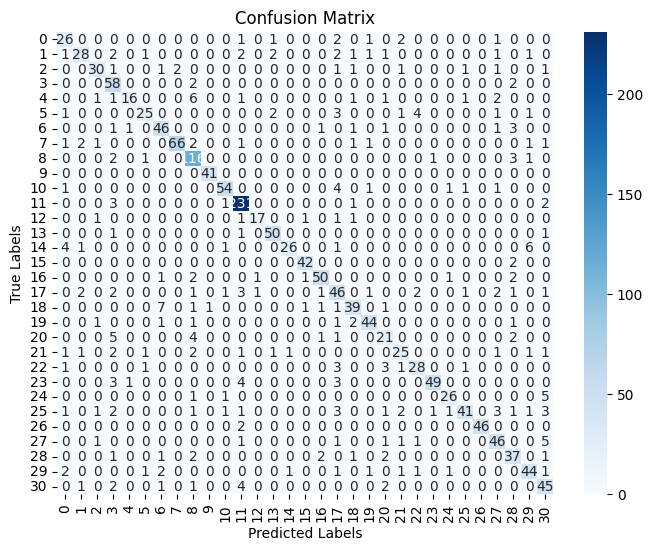


Accuracy: 0.8290
Precision: 0.8369
Recall: 0.8290
F1 Score: 0.8282
ROC AUC Score: 0.9844


In [ ]:
# Menghitung metrik evaluasi
cnn_acc = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred, average='weighted')
cnn_recall = recall_score(y_test, y_pred, average='weighted')
cnn_f1 = f1_score(y_test, y_pred, average='weighted')
cnn_roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

# Visualisasi dengan Seaborn (Heatmap Confusion Matrix)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan hasil metrik
print(f"\nAccuracy: {cnn_acc:.4f}")
print(f"Precision: {cnn_precision:.4f}")
print(f"Recall: {cnn_recall:.4f}")
print(f"F1 Score: {cnn_f1:.4f}")
print(f"ROC AUC Score: {cnn_roc_auc:.4f}")

Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


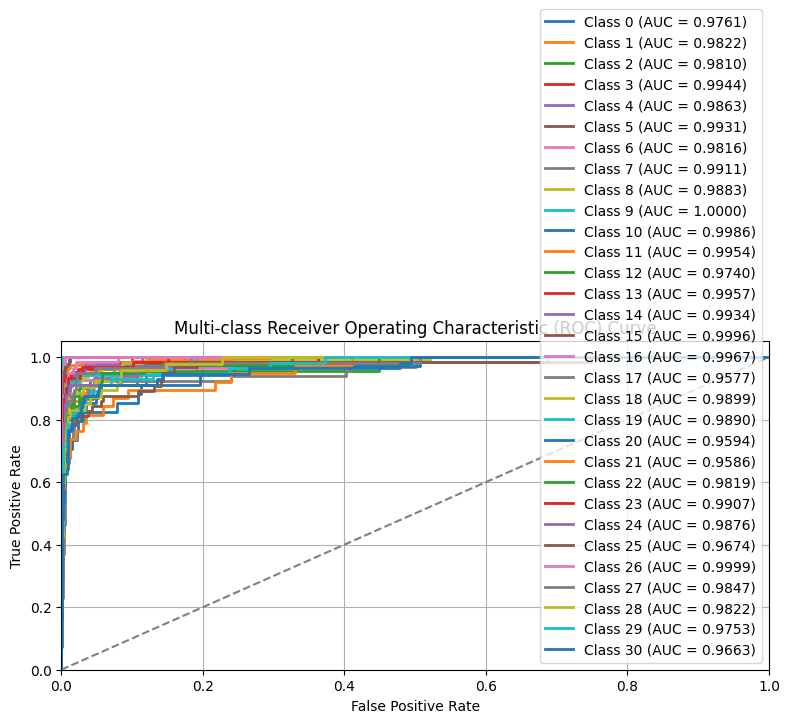

In [ ]:
# Normalisasi probabilitas jika diperlukan (pastikan y_pred_probs sudah dalam bentuk probabilitas)
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek jumlah kelas
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi y_test ke One-vs-Rest (biner)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(8, 6))

# Plot ROC untuk tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)  # Menghitung AUC untuk kelas ke-i
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Menambahkan garis referensi diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling dan layout
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analisis CNN Model

## 📊 Evaluasi Model CNN Tensorflow

### 🔢 Confusion Matrix
Confusion matrix menunjukkan distribusi prediksi benar dan salah dari model klasifikasi terhadap setiap kelas (0–9). Baris = label sebenarnya, kolom = prediksi model.

### 📈 Metrik Evaluasi
Berikut hasil evaluasi model:

- **Accuracy**: 0.8290
  $$\text{Accuracy} = \frac{\text{Jumlah Prediksi Benar}}{\text{Total Seluruh Data}}$$

- **Precision**: 0.8369
  $$\text{Precision} = \frac{TP}{TP + FP}$$
  Precision mengukur seberapa akurat model ketika memprediksi sebuah kelas (menghindari false positives).

- **Recall**: 0.8290
  $$\text{Recall} = \frac{TP}{TP + FN}$$
  Recall mengukur seberapa baik model dalam menemukan semua contoh yang benar (menghindari false negatives).

- **F1 Score**: 0.8282
  $$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
  Kombinasi harmonis antara precision dan recall.

- **ROC AUC Score**: 0.9844
  ROC AUC menunjukkan performa model dalam membedakan kelas secara keseluruhan. Nilai dekat 1 berarti sangat baik.

### ✅ Kesimpulan
Model ini memiliki performa cukup baik dengan **akurasi sekitar 82.9%** dan **AUC Score sangat tinggi** (0.9844) menandakan model mampu membedakan antar kelas dengan baik. F1 score juga cukup tinggi, menandakan keseimbangan antara precision dan recall.